<a href="https://colab.research.google.com/github/MahimaMaurya/Indigo/blob/main/1_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [17]:
 train_df1 = pd.read_csv('/content/cleaned_train_df.csv', on_bad_lines='skip')

In [18]:
train_df1 = pd.read_csv('/content/cleaned_train_df.csv')

In [19]:
train_df1.head()

,question,answer
0,How can a piece of paper folded 103 times be l...,It isn’t. It just has a stack height longer t...
1,Did a landlord ever offer to lower your rent s...,Did a landlord ever offer to lower your rent s...
2,"If the Von Karman line is 62 miles above, then...",No. The Karman line has nothing to do with the...
3,Do soldiers pick up fallen enemy weapons to us...,"It’s against the rules of war so no, if they r..."
4,How do I get my son to stop making music?,"Wha- if he loves making music, let him make mu..."


In [20]:
train_df1.describe()

,question,answer
count,41565,41549
unique,3136,40449
top,How much will liposuction cost in India?,No
freq,86,60


In [21]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41565 entries, 0 to 41564
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  41565 non-null  object
 1   answer    41549 non-null  object
dtypes: object(2)
memory usage: 649.6+ KB


# Exploratory Data Analysis

# **Step 1 : Column Types**


*   Both columns contains Mixed data type

# **Step 2 : Univariate Analysis**
1. Distribution of Text Lengths

  `Question`
  *   **Majority of questions are relatively short:** This indicates a preference for concise and direct queries.
  *   **Distribution is right-skewed:** There are a few instances of longer questions, but they are less frequent.

  `Answer`
  *   **Answers tend to be longer than questions:** This suggests that users often provide detailed explanations or responses.
  *   **Distribution is also right-skewed:** Similar to questions, there are fewer extremely long answers.

  *   **Longer tail compared to questions:** The distribution shows a larger proportion of longer answers than longer questions, indicating a wider range of answer lengths.


2. Column Word Analysis

  `Question`

  *   **Focus on information seeking:** Words like "what", "who", "when", "where", "why", and "how" are frequent, indicating a strong focus on gathering information.
  *   **Open ended questions:** The presence of words like "best", "like", "think", and "one" suggests open ended questions that seek opinions or explanations.

  `Answer`

  *   **Informative responses:** Words like "get", "use", "make", "good", "way", "time", "know", "help", and "need" indicate informative answers that provide solutions or explanations.
  *   **Varied vocabulary:** Compared to questions, answers seem to have a more diverse range of words, possibly because they elaborate on concepts and provide specific details.













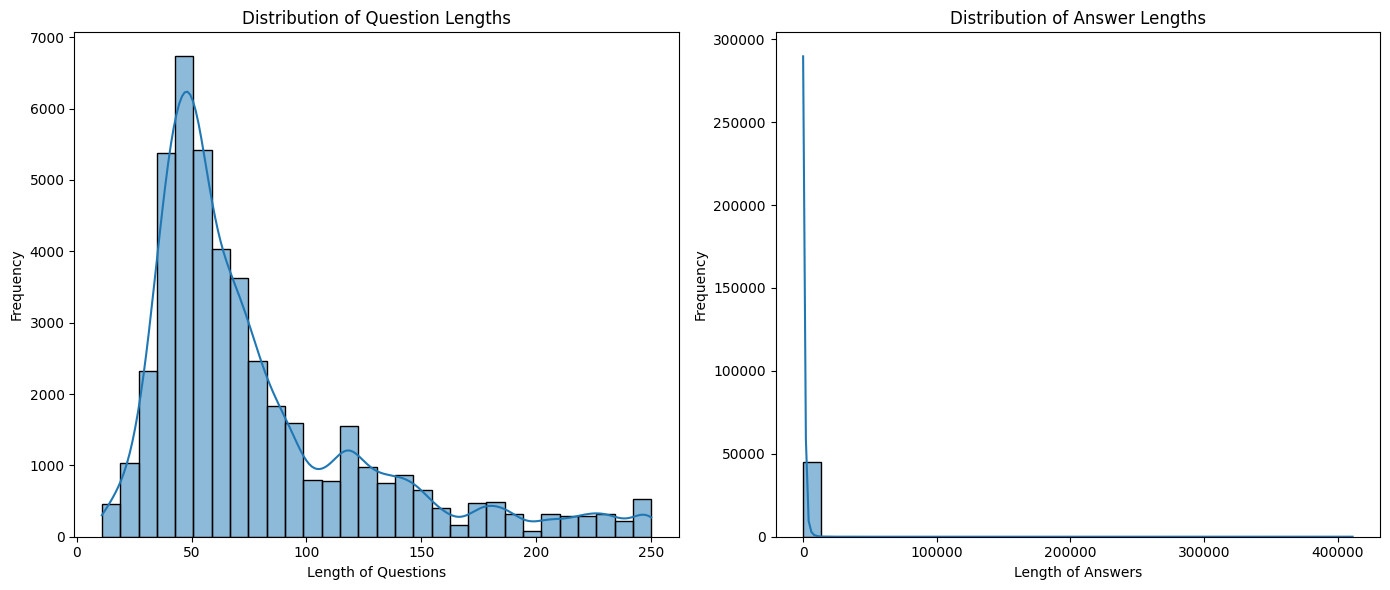

In [23]:
# Load the cleaned DataFrame
train_df1 = pd.read_csv('/content/cleaned_train_df.csv')

train_df1['question'] = train_df1['question'].fillna('').astype(str)
train_df1['answer'] = train_df1['answer'].fillna('').astype(str)

# Calculate the length of text in 'question' and 'answer' columns
train_df1['question_length'] = train_df1['question'].apply(len)
train_df1['answer_length'] = train_df1['answer'].apply(len)

# Plot histograms to visualize the distribution of text lengths
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df1['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(train_df1['answer_length'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Tokenize and count the frequency of each word in the 'question' column
stop_words = set(stopwords.words('english'))

def get_most_common_words(text_series, num_words=20):
    all_words = ' '.join(text_series).split()
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(num_words)

# Get the most common words in questions and answers
common_words_questions = get_most_common_words(train_df1['question'])
common_words_answers = get_most_common_words(train_df1['answer'])

print("Most Common Words in Questions:", common_words_questions)
print("Most Common Words in Answers:",common_words_answers)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words in Questions: [('best', 3272), ('would', 2403), ('get', 2162), ('people', 1844), ('like', 1378), ('think', 1373), ('one', 1241), ('ever', 1088), ('use', 999), ('make', 928), ('gun', 908), ('way', 859), ('good', 842), ('want', 806), ('say', 779), ('believe', 766), ('India?', 762), ('thing', 721), ('better', 718), ("What's", 715)]
Most Common Words in Answers: [('[URL:', 19722), ('[LINKED_TEXT:', 16330), ('one', 15962), ('like', 15562), ('would', 15065), ('get', 13122), ('people', 12053), ('also', 11786), ('-', 11365), ('time', 9650), ('make', 9384), ('use', 8847), ('many', 8559), ('even', 8045), ('may', 7962), ('need', 7649), ('good', 7628), ('know', 7310), ('help', 7293), ('best', 7194)]


In [25]:
# Compute basic statistics for text lengths
question_stats = train_df1['question_length'].describe()
answer_stats = train_df1['answer_length'].describe()

print("Question Length Statistics:\n", question_stats)
print("Answer Length Statistics:\n", answer_stats)

Question Length Statistics:
 count    45137.000000
mean        77.807032
std         48.973103
min         11.000000
25%         45.000000
50%         61.000000
75%         93.000000
max        250.000000
Name: question_length, dtype: float64
Answer Length Statistics:
 count     45137.000000
mean        947.145225
std        4020.526871
min           0.000000
25%         146.000000
50%         419.000000
75%        1070.000000
max      410998.000000
Name: answer_length, dtype: float64


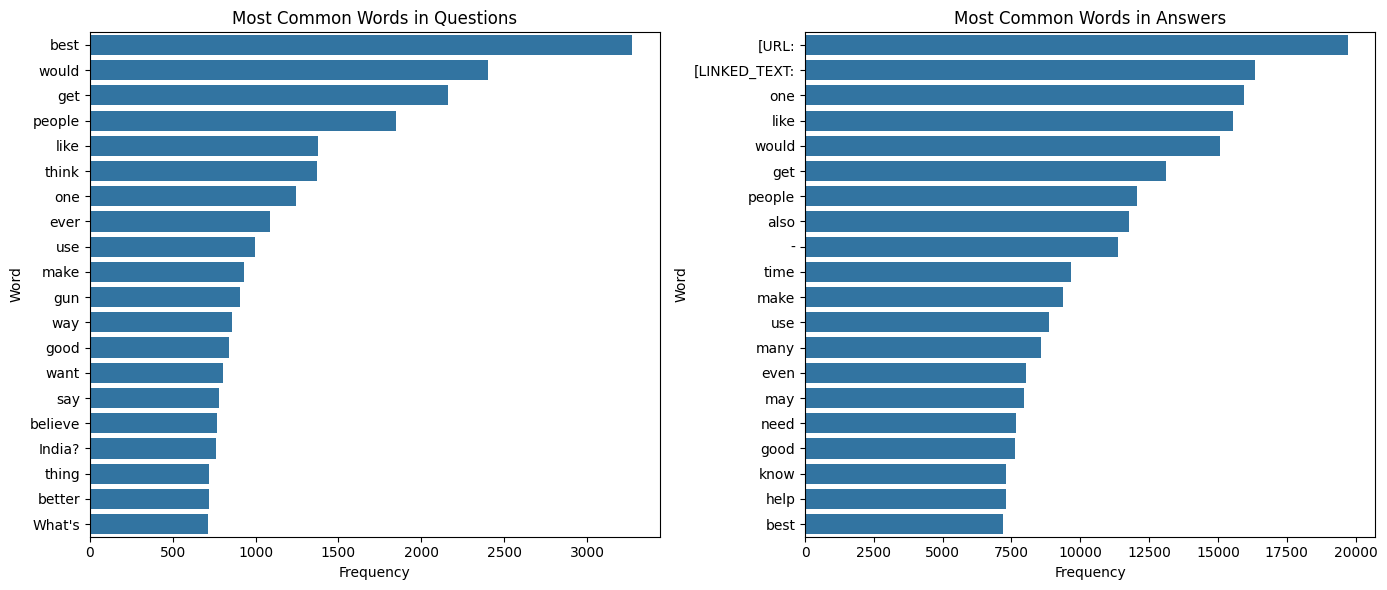

In [26]:
# Convert to DataFrame for visualization
common_words_questions_df = pd.DataFrame(common_words_questions, columns=['Word', 'Frequency'])
common_words_answers_df = pd.DataFrame(common_words_answers, columns=['Word', 'Frequency'])

# Plot bar plots for the most common words
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=common_words_questions_df, x='Frequency', y='Word')
plt.title('Most Common Words in Questions')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(data=common_words_answers_df, x='Frequency', y='Word')
plt.title('Most Common Words in Answers')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

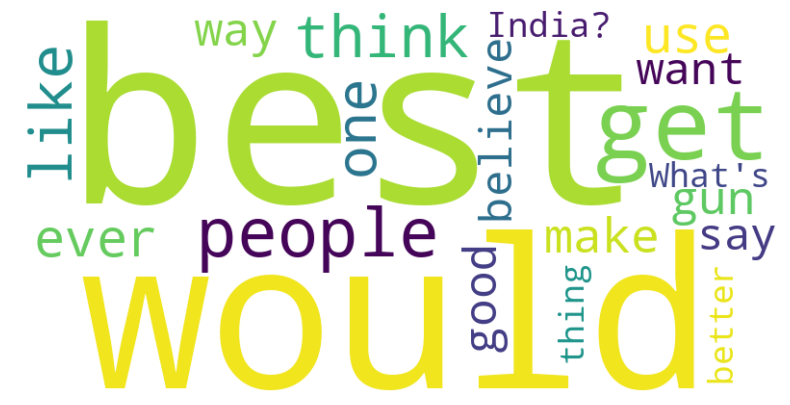

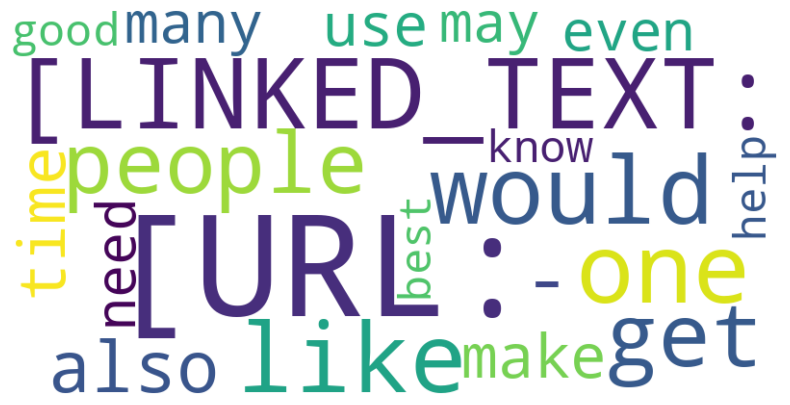

In [27]:


# Create word clouds for questions and answers
def create_wordcloud(word_counts):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

create_wordcloud(common_words_questions)
create_wordcloud(common_words_answers)


In [28]:
def get_stop_words(text_series, stop_words):
    words = ' '.join(text_series).split()
    filtered_words = [word for word in words if word.lower() in stop_words]
    return filtered_words

# Get stop words in questions and answers
questions_stop_words = get_stop_words(train_df1['question'], stop_words)
answers_stop_words = get_stop_words(train_df1['answer'], stop_words)

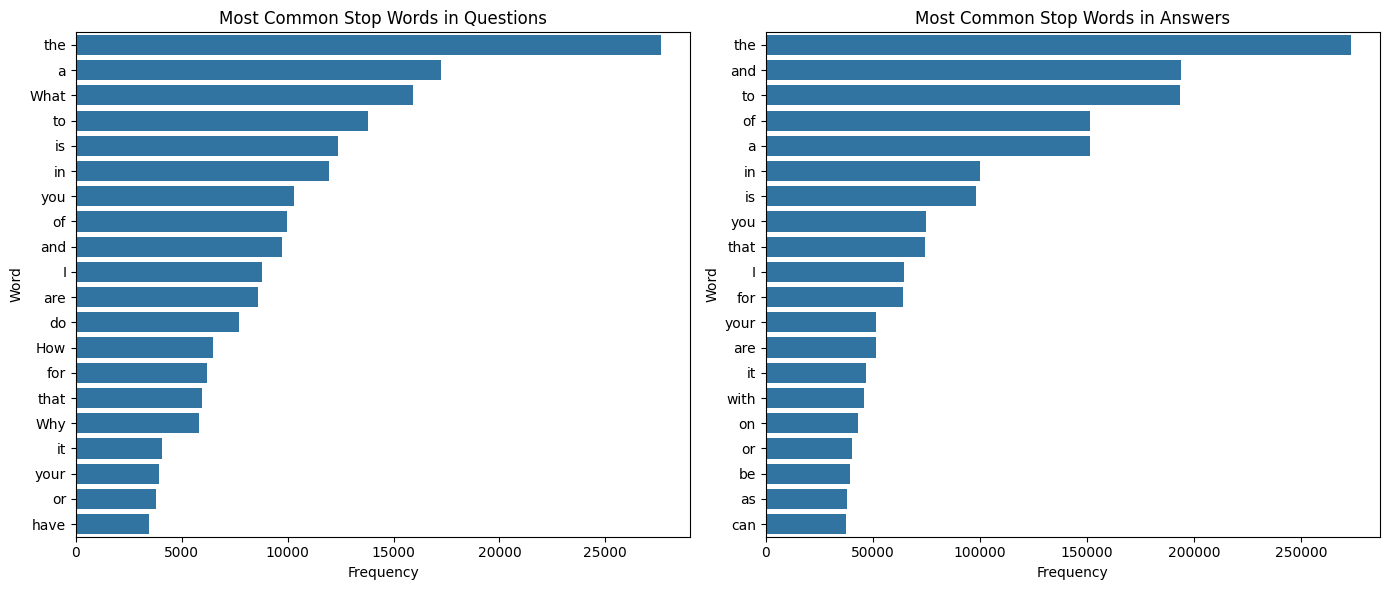

In [29]:
# Count stop words
question_stop_word_counts = Counter(questions_stop_words)
answer_stop_word_counts = Counter(answers_stop_words)

# Convert to DataFrames
question_stop_words_df = pd.DataFrame(question_stop_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)
answer_stop_words_df = pd.DataFrame(answer_stop_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot bar charts for the most common stop words in questions and answers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=question_stop_words_df, x='Frequency', y='Word')
plt.title('Most Common Stop Words in Questions')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(data=answer_stop_words_df, x='Frequency', y='Word')
plt.title('Most Common Stop Words in Answers')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

In [39]:
import string
import nltk
from nltk.stem import PorterStemmer
import pandas as pd
tokenized_ques = []
tokenized_ans = []


stemmed_ques = []
stemmed_ans = []

# Bag of Words with frequency
all_words = []
all_stemmed_words = []

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

# Stemming
ps = PorterStemmer()

for i in range(0, train_df1.question.size):

  ques = train_df1.question[i]
  # Remove Punctuation Marks from sentences
  ques = ques.translate(translator)

  # Tokenizing the sentence and converting words to lower case
  ques = [token.lower() for token in ques.split()]
  tokenized_ques.append(ques)
  all_words.extend(ques)

  # Stemming the tokens
  ques = [ps.stem(token) for token in ques]
  stemmed_ques.append(ques)
  all_stemmed_words.extend(ques)

train_df1.insert(1, "tokenized_question", tokenized_ques, True)
train_df1.insert(2, "stemmed_question", stemmed_ques, True)

# Tokenizing and Stemming Words in Answer
for i in range(0, train_df1.answer.size):

  ans = train_df1.answer[i]
  ans = ans.translate(translator)

  # Tokenizing the sentence and converting words to lower case
  ans = [token.lower() for token in ans.split()]
  tokenized_ans.append(ans)

  # Stemming the tokens
  ans = [ps.stem(token) for token in ans]
  stemmed_ans.append(ans)

train_df1.insert(4, "tokenized_answer", tokenized_ans, True)
train_df1.insert(5, "stemmed_answer", stemmed_ans, True)
train_df1.head(6)

,question,tokenized_question,stemmed_question,answer,tokenized_answer,stemmed_answer,question_length,answer_length
0,How can a piece of paper folded 103 times be l...,"[how, can, a, piece, of, paper, folded, 103, t...","[how, can, a, piec, of, paper, fold, 103, time...",It isn’t. It just has a stack height longer t...,"[it, isn’t, it, just, has, a, stack, height, l...","[it, isn’t, it, just, ha, a, stack, height, lo...",81,119
1,Did a landlord ever offer to lower your rent s...,"[did, a, landlord, ever, offer, to, lower, you...","[did, a, landlord, ever, offer, to, lower, you...",Did a landlord ever offer to lower your rent s...,"[did, a, landlord, ever, offer, to, lower, you...","[did, a, landlord, ever, offer, to, lower, you...",72,258
2,"If the Von Karman line is 62 miles above, then...","[if, the, von, karman, line, is, 62, miles, ab...","[if, the, von, karman, line, is, 62, mile, abo...",No. The Karman line has nothing to do with the...,"[no, the, karman, line, has, nothing, to, do, ...","[no, the, karman, line, ha, noth, to, do, with...",114,759
3,Do soldiers pick up fallen enemy weapons to us...,"[do, soldiers, pick, up, fallen, enemy, weapon...","[do, soldier, pick, up, fallen, enemi, weapon,...","It’s against the rules of war so no, if they r...","[it’s, against, the, rules, of, war, so, no, i...","[it’, against, the, rule, of, war, so, no, if,...",89,379
4,How do I get my son to stop making music?,"[how, do, i, get, my, son, to, stop, making, m...","[how, do, i, get, my, son, to, stop, make, music]","Wha- if he loves making music, let him make mu...","[wha, if, he, loves, making, music, let, him, ...","[wha, if, he, love, make, music, let, him, mak...",41,244
5,How do I get my neighbor to accept the survey ...,"[how, do, i, get, my, neighbor, to, accept, th...","[how, do, i, get, my, neighbor, to, accept, th...",Go down to the county courthouse and get a cop...,"[go, down, to, the, county, courthouse, and, g...","[go, down, to, the, counti, courthous, and, ge...",180,299


In [41]:
train_df1.to_csv('tokenized_output.csv', index=False)